In [53]:
import numpy as np
import pandas as pd
import scipy.constants as consts
import matplotlib.pyplot as plt
from io import StringIO
import glob
import os, sys
import re
plt.rcParams['figure.dpi']= 300

In [54]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
plt.rcParams.update(params)
# set wanted parameters for plots

In [90]:
def name_dat_file(directory):
    filenames = [f for f in glob.glob('/home/hannahcb/project2ML/results/data/'+ directory + '*.dat') if not 'params' in f]
    return filenames

Sort filenames nicely

In [56]:
def tryint(s):
    try:
        return int(s)
    except:
        return s

def alphanum_key(s):
    """ Turn a string into a list of string and number chunks.
        "z23a" -> ["z", 23, "a"]"""
    return [ tryint(c) for c in re.split('([0-9]+)', s) ]

def sort_nicely(l):
    #Sort the given list in the way that humans expect
    l.sort(key=alphanum_key)
    return l

### Read files into dataframe

In [57]:
def energy_to_df(filename):
    column_names = ['energy','variance', 't_cpu', 'acceptance']
    df = pd.read_csv(filename,names=column_names, delim_whitespace=True,comment='#')
    return df

### Blocking

In [58]:
def block_mean(vec):
    return sum(vec)/len(vec)

def meanAndVariance(vec):
    mean = np.mean(vec)
    var = sum([i ** 2 for i in vec])/len(vec) - mean*mean
    return mean, var

In [59]:
def everything_is_awesome(data): # does the blocking on the dataframe
    n_blocks = 200
    block_size_min = 100
    block_size_max = len(data)/100
    block_step = int ((block_size_max - block_size_min + 1) / n_blocks)
    mean_vec = []
    var_vec = []
    block_sizes = []
    for i in range(0, n_blocks):
        mean_temp_vec = []
        start_point = 0
        end_point = block_size_min + block_step*i
        block_size = end_point
        block_sizes.append(block_size)

    mean_temp_vec.append(block_mean(data[start_point:end_point]))
    start_point = end_point
    end_point += block_size_min + block_step*i
    mean, var = meanAndVariance(mean_temp_vec)
    mean_vec.append(mean)
    var_vec.append(np.sqrt(var/(len(data)/float(block_size) - 1.0)))
    mean, var = meanAndVariance(data)

    return mean,var

#### Add $\sigma_b$ to a dataframe

In [60]:
def add_block(df):
    meanlist = []
    stdlist = []
    tempmean, tempvar = everything_is_awesome(df['energy'])
    meanlist.append(tempmean)
    stdlist.append(np.sqrt(np.abs((tempvar))))
    df['std_b'] = stdlist
    return df

In [61]:
def plotenergy(df,legend_names):
    plt.plot(df['energy'])
    plt.xlabel('time')
    plt.ylabel('energy')
    plt.legend(legend_names)
    plt.show()

In [62]:
dire = '../results/data/'

In [80]:
dbrute =  'brute_gamma/'

In [81]:
dbrute

'brute_gamma/'

In [140]:
brute_gam = name_dat_file(dbrute)

In [141]:
brute_gam = sort_nicely(brute_gam)

In [142]:
brute_gam

['/home/hannahcb/project2ML/results/data/brute_gamma/brute_N1_d1gam0.010000_H2_rho0.400000.dat',
 '/home/hannahcb/project2ML/results/data/brute_gamma/brute_N1_d1gam0.050000_H2_rho0.400000.dat',
 '/home/hannahcb/project2ML/results/data/brute_gamma/brute_N1_d1gam0.100000_H2_rho0.400000.dat',
 '/home/hannahcb/project2ML/results/data/brute_gamma/brute_N1_d1gam0.500000_H2_rho0.400000.dat',
 '/home/hannahcb/project2ML/results/data/brute_gamma/brute_N1_d1gam1.000000_H2_rho0.400000.dat',
 '/home/hannahcb/project2ML/results/data/brute_gamma/brute_N1_d1gam2.000000_H2_rho0.400000.dat']

In [143]:
bg = energy_to_df(brute_gam[-1])

In [144]:
bg

,energy,variance,t_cpu,acceptance
0,0.569322,7.839763e-08,0.547484,0.946671
1,0.505514,7.657419e-09,0.524135,0.946835
2,0.502398,3.470968e-09,0.507375,0.945745
3,0.501331,2.914916e-09,0.486574,0.945704
4,0.501515,2.699228e-09,0.539416,0.945698
5,0.500765,2.458192e-09,0.564191,0.945761
6,0.500722,2.121641e-09,0.557410,0.945760
7,0.501293,2.151088e-09,0.567484,0.945200
8,0.501293,1.961637e-09,0.541098,0.945340
9,0.500387,1.712454e-09,0.498122,0.946009


In [145]:
brute_gam_c = brute_gam

In [146]:
brute_gam_c

['/home/hannahcb/project2ML/results/data/brute_gamma/brute_N1_d1gam0.010000_H2_rho0.400000.dat',
 '/home/hannahcb/project2ML/results/data/brute_gamma/brute_N1_d1gam0.050000_H2_rho0.400000.dat',
 '/home/hannahcb/project2ML/results/data/brute_gamma/brute_N1_d1gam0.100000_H2_rho0.400000.dat',
 '/home/hannahcb/project2ML/results/data/brute_gamma/brute_N1_d1gam0.500000_H2_rho0.400000.dat',
 '/home/hannahcb/project2ML/results/data/brute_gamma/brute_N1_d1gam1.000000_H2_rho0.400000.dat',
 '/home/hannahcb/project2ML/results/data/brute_gamma/brute_N1_d1gam2.000000_H2_rho0.400000.dat']

In [175]:
for i in range(len(brute_gam_c)):
    brute_gam_c[i]= brute_gam_c[i].strip('/home/hannahcb/project2ML/results/data/brute_gamma/')
brute_gam_c

['N1_d1gam0.010000_H2_rho0.400000.',
 'N1_d1gam0.050000_H2_rho0.400000.',
 'N1_d1gam0.100000_H2_rho0.400000.',
 'N1_d1gam0.500000_H2_rho0.400000.',
 'N1_d1gam1.000000_H2_rho0.400000.',
 'N1_d1gam2.000000_H2_rho0.400000.']

In [180]:
def divide_n_conc(string):
    string = string.strip('.dat')
    return re.search(r'[_,\d]',string).groups()

In [181]:
print(divide_n_conc(brute_gam_c[0]))

()


In [192]:
dts = name_dat_file('imp_dt_new/')
dtsnew = name_dat_file('imp_dt_sameinit/')
dtsnew = sort_nicely(dtsnew)
dts = sort_nicely(dts)
dtsnew

['/home/hannahcb/project2ML/results/data/imp_dt_sameinit/imp_N1_d1gam0.010000_H2_dt0.001000.dat',
 '/home/hannahcb/project2ML/results/data/imp_dt_sameinit/imp_N1_d1gam0.050000_H2_dt0.010000.dat',
 '/home/hannahcb/project2ML/results/data/imp_dt_sameinit/imp_N1_d1gam0.100000_H2_dt0.100000.dat',
 '/home/hannahcb/project2ML/results/data/imp_dt_sameinit/imp_N1_d1gam0.500000_H2_dt0.200000.dat',
 '/home/hannahcb/project2ML/results/data/imp_dt_sameinit/imp_N1_d1gam1.000000_H2_dt0.500000.dat',
 '/home/hannahcb/project2ML/results/data/imp_dt_sameinit/imp_N1_d1gam2.000000_H2_dt0.800000.dat']

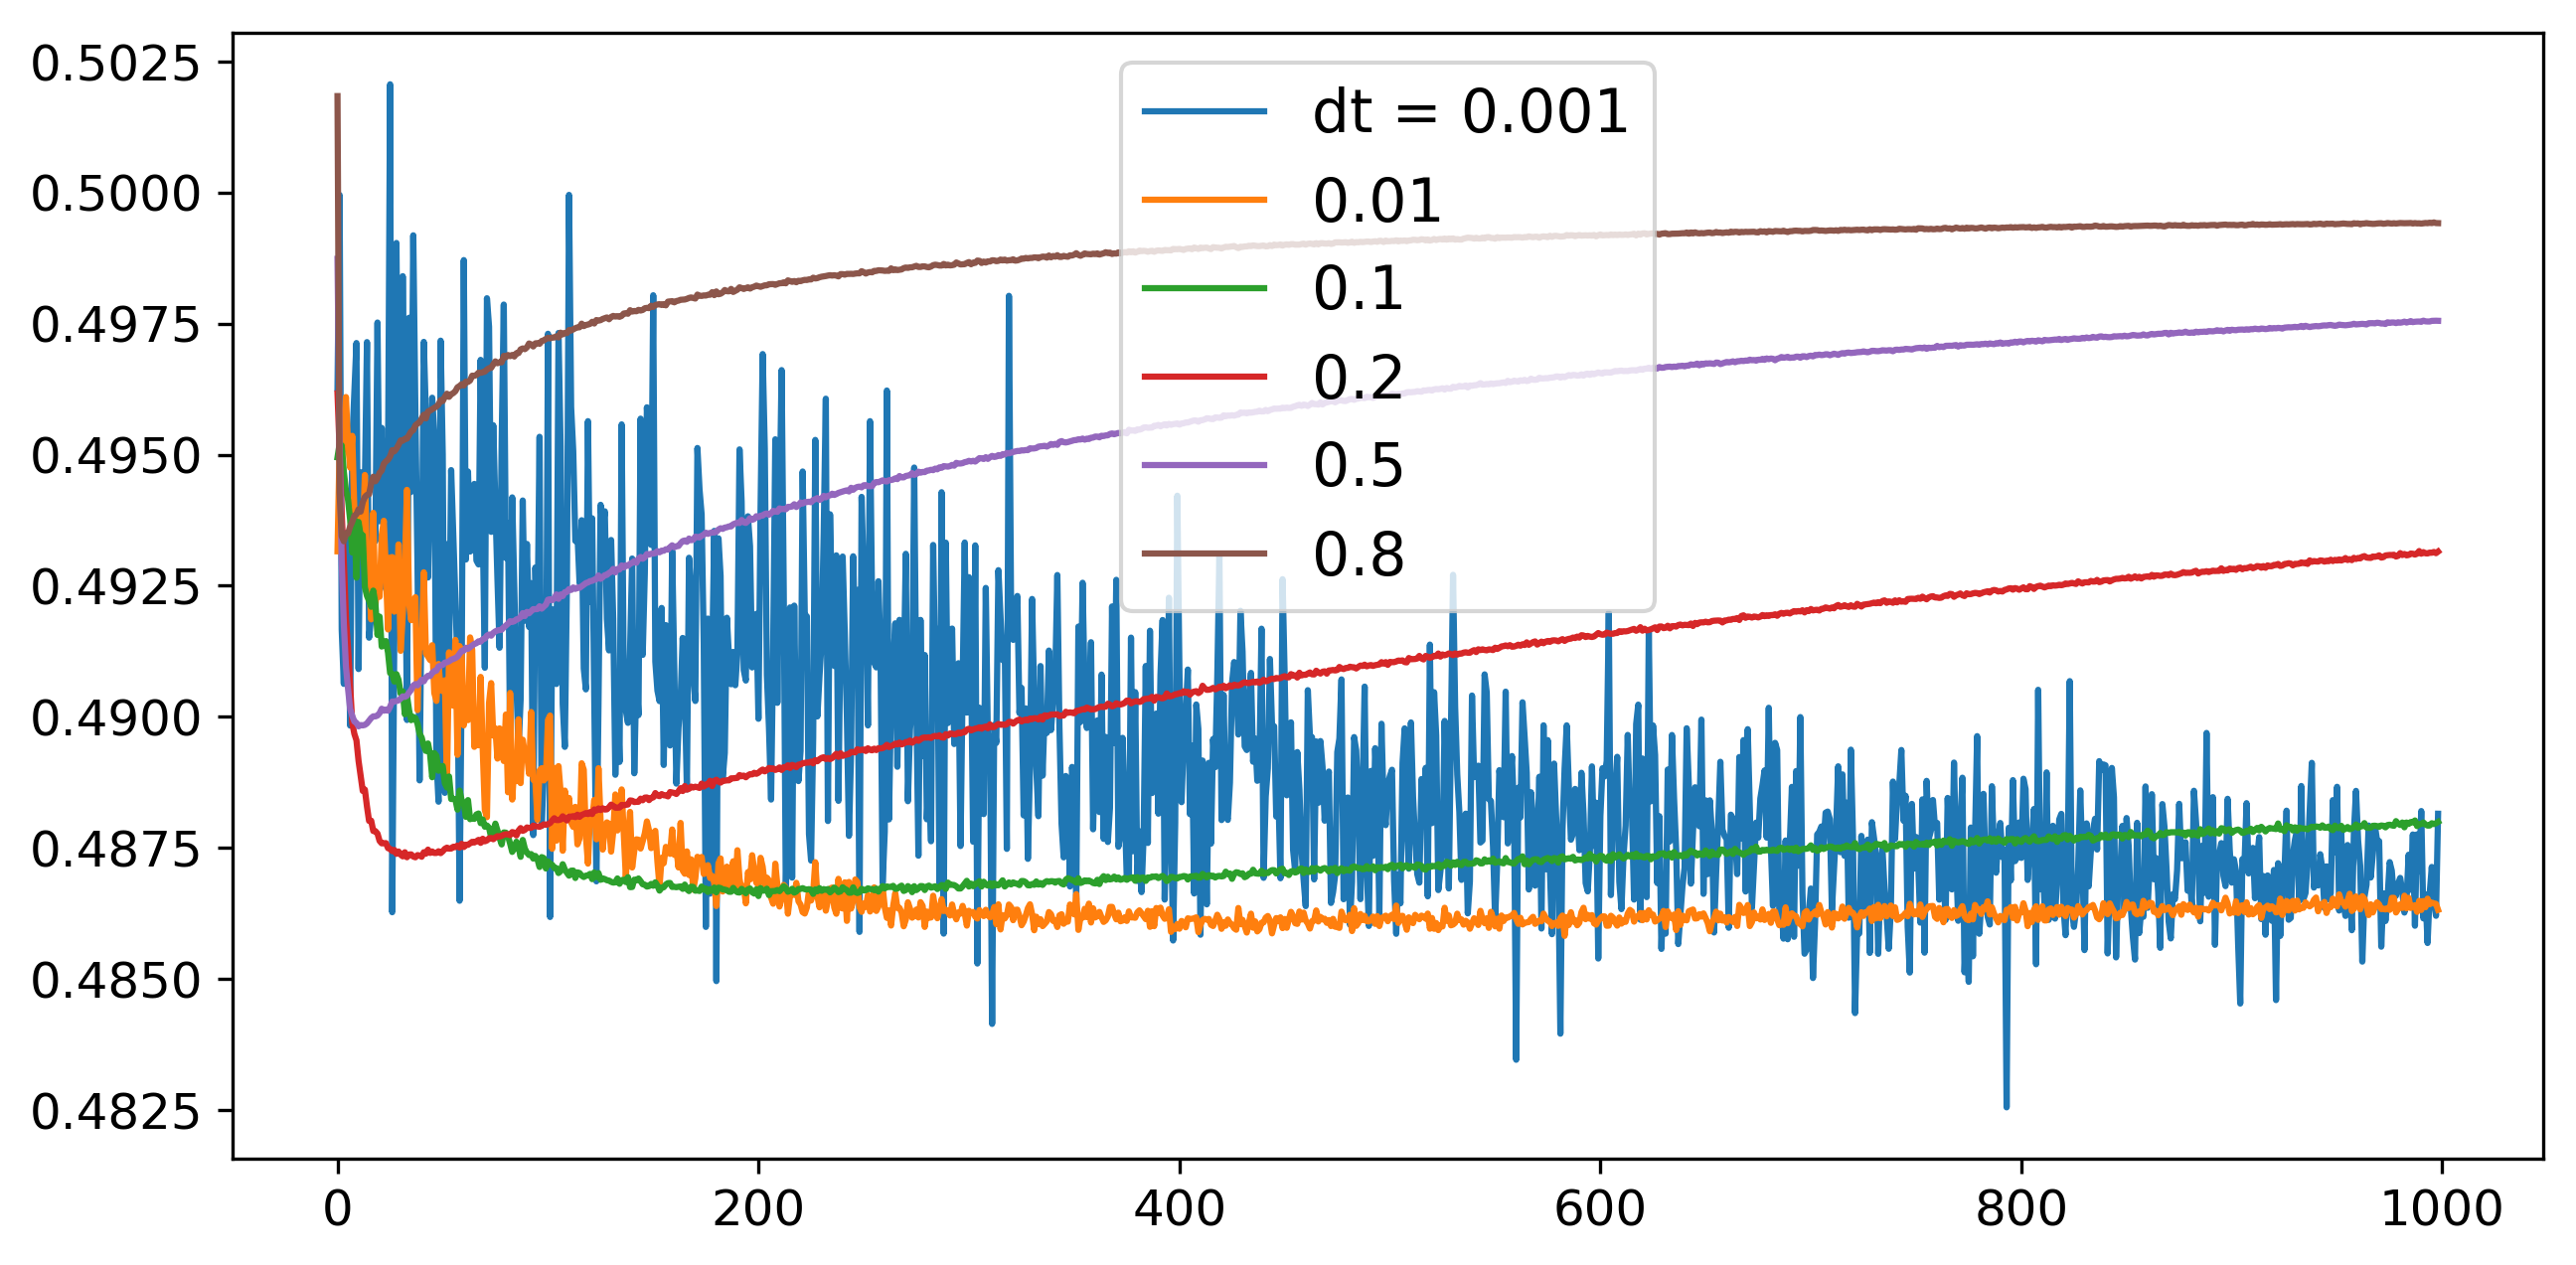

In [195]:
for i in range(len(dtsnew)):
    df = energy_to_df(dtsnew[i])
    
    plt.plot(df['energy'])
    
    
plt.legend([r'dt = 0.001','dt = 0.01','dt = 0.1','dt = 0.2','dt = 0.5','dt = 0.8'])
plt.xlabel('Energy')
plt.ylabel('GDC')
plt.show()